In [15]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('./Data_w_targets/demo_zip_11.csv').drop(columns='Unnamed: 0')
df

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,...,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date,avg_rent
0,26291,28,53,1987.0,0,0,18,12,0,0,...,0,0,134,38,49,0,19,28,20072011,957.272727
1,80927,34,215,2005.0,0,0,0,0,0,0,...,0,0,487,50,384,0,40,13,20072011,NaN
2,1253,84,195,1979.0,0,14,0,0,0,0,...,4,4,543,100,337,15,22,60,20072011,1742.555556
3,81130,128,230,1982.0,26,2,0,0,0,4,...,16,5,660,81,450,10,48,71,20072011,NaN
4,3592,197,448,1982.0,27,27,2,11,9,19,...,5,0,1153,63,814,10,76,171,20072011,931.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13157,34211,288,780,1999.0,14,13,0,0,0,0,...,34,0,2345,512,1485,11,127,199,20072011,1614.416667
13158,28646,97,173,1984.0,0,0,0,0,0,0,...,2,2,560,105,366,0,38,45,20072011,1001.363636
13159,95335,141,220,1971.0,56,20,0,0,0,0,...,5,2,703,45,308,0,0,346,20072011,1415.916667
13160,86017,50,251,1984.0,0,0,0,0,0,0,...,0,0,750,225,439,0,11,75,20072011,1364.000000


In [17]:
df.isna().sum().sort_values(ascending=False).head(20)

pop_25_years_over                                              13162
associates_degree                                              13162
bachelors_degree                                               13162
high_school_diploma                                            13162
less_one_year_college                                          13162
masters_degree                                                 13162
one_year_more_college                                          13162
avg_rent                                                        1225
aggregate_travel_time_to_work                                    981
median_rent                                                       45
renter_occupied_housing_units_paying_cash_median_gross_rent       44
percent_income_spent_on_rent                                      39
median_year_structure_built                                        9
owner_occupied_housing_units_median_value                          1
owner_occupied_housing_units_upper

In [18]:
df.isna().sum().sort_values(ascending=False).head(20).keys()

Index(['pop_25_years_over', 'associates_degree', 'bachelors_degree',
       'high_school_diploma', 'less_one_year_college', 'masters_degree',
       'one_year_more_college', 'avg_rent', 'aggregate_travel_time_to_work',
       'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'percent_income_spent_on_rent', 'median_year_structure_built',
       'owner_occupied_housing_units_median_value',
       'owner_occupied_housing_units_upper_value_quartile', 'gini_index',
       'income_per_capita',
       'owner_occupied_housing_units_lower_value_quartile',
       'commute_35_39_mins',
       'employed_arts_entertainment_recreation_accommodation_food'],
      dtype='object')

In [19]:
df2 = df.drop(columns=['pop_25_years_over', 'associates_degree', 'bachelors_degree',
       'high_school_diploma', 'less_one_year_college', 'masters_degree',
       'one_year_more_college', 'aggregate_travel_time_to_work',
       #'median_rent',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'percent_income_spent_on_rent', 'median_year_structure_built']).dropna().reset_index().drop(columns='index')

In [20]:
X = df2.drop(columns=['geo_id', 'do_date', 'avg_rent'])
y = df2.avg_rent

In [66]:
mlr = LinearRegression()
mlr_train = []
mlr_test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_train.append(mlr.score(X_train, y_train))
    mlr_test.append(mlr.score(X_test, y_test))

<AxesSubplot:xlabel='score', ylabel='Density'>

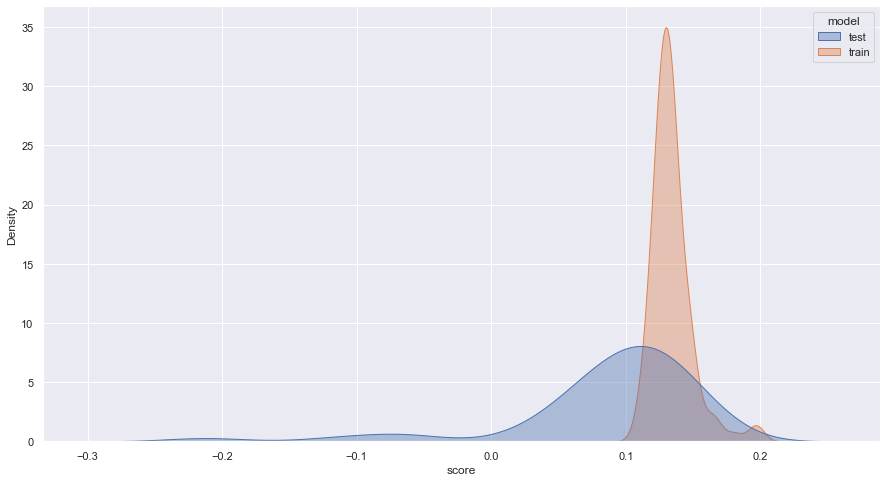

In [67]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [ ]:
# Wow. that's... uh... very bad. It's probably overfitting on the training set... or not 😖
# Let's try lasso

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Setting max_iter because it doesn't coverge without it
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.1,10.0,40)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

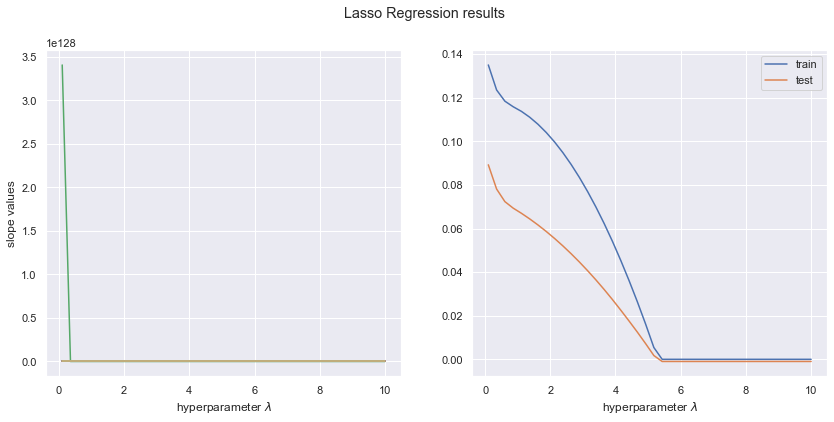

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [10]:
from itertools import combinations

In [14]:
len(X.columns)

239

In [22]:
model = ensemble.RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
%time model.fit(X_train, y_train)
print("The training r2: %.5f" % (model.score(X_train, y_train)))
print("The test     r2: %.5f" % (model.score(X_test, y_test)))

CPU times: user 1min 59s, sys: 255 ms, total: 2min
Wall time: 2min
The training r2: 0.85726
The test     r2: 0.38885


In [21]:
model = ensemble.RandomForestRegressor()
fst_base_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    model.fit(X_train, y_train)
    fst_base_scores.append(model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
fst_data = pd.concat([#pd.DataFrame({'score':fst_scores,'model':'Tuned Parameters'}),
                  pd.DataFrame({'score':fst_base_scores,'model':'Default Parameters'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.6)
sns.kdeplot(data=fst_data, x="score", hue="model", fill=True, common_norm=False, alpha=0.4, linewidth=3)